In [39]:
# linear algebra
import numpy as np 

# data processing
import pandas as pd 

# data visualization
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style
#machine learning
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC, LinearSVC

In [40]:
rawdata= pd.read_csv("/Users/cailayoung/Desktop/Final/fetal_health.csv")
rawdata

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.000,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.000,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.000,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,140.0,0.000,0.000,0.007,0.000,0.0,0.0,79.0,0.2,25.0,...,137.0,177.0,4.0,0.0,153.0,150.0,152.0,2.0,0.0,2.0
2122,140.0,0.001,0.000,0.007,0.000,0.0,0.0,78.0,0.4,22.0,...,103.0,169.0,6.0,0.0,152.0,148.0,151.0,3.0,1.0,2.0
2123,140.0,0.001,0.000,0.007,0.000,0.0,0.0,79.0,0.4,20.0,...,103.0,170.0,5.0,0.0,153.0,148.0,152.0,4.0,1.0,2.0
2124,140.0,0.001,0.000,0.006,0.000,0.0,0.0,78.0,0.4,27.0,...,103.0,169.0,6.0,0.0,152.0,147.0,151.0,4.0,1.0,2.0


In [41]:
cleandata=rawdata.drop(["mean_value_of_short_term_variability","mean_value_of_long_term_variability", "histogram_min", "histogram_max",
                       "histogram_number_of_peaks", "histogram_number_of_zeroes", "histogram_mode",
                       "histogram_mean","histogram_median","histogram_variance",
                       "histogram_width", "histogram_tendency"], axis=1)
x=cleandata["fetal_health"]
x= x.astype(int)
x= x.replace({1:0, 2:1, 3:1})
x
#getting a binary result. fetuse is either normal(x=0) or abnormal (x=1)

0       1
1       0
2       0
3       0
4       0
       ..
2121    1
2122    1
2123    1
2124    1
2125    0
Name: fetal_health, Length: 2126, dtype: int64

In [42]:
pd.DataFrame({"boolean": x, "fetal health": cleandata.fetal_health})
#creating a df with the boolean value of the fetal health column and the actual fetal health score to 
#confirm that normal fetuses have a value of 0 and suspect/pathological fetuses have a value of 1.

,boolean,fetal health
0,1,2.0
1,0,1.0
2,0,1.0
3,0,1.0
4,0,1.0
...,...,...
2121,1,2.0
2122,1,2.0
2123,1,2.0
2124,1,2.0


In [43]:
cleandata["normal"]=x

cleandata
#adding normal column to df

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,fetal_health,normal
0,120.0,0.000,0.000,0.000,0.000,0.0,0.0,73.0,43.0,2.0,1
1,132.0,0.006,0.000,0.006,0.003,0.0,0.0,17.0,0.0,1.0,0
2,133.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,0.0,1.0,0
3,134.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,0.0,1.0,0
4,132.0,0.007,0.000,0.008,0.000,0.0,0.0,16.0,0.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...
2121,140.0,0.000,0.000,0.007,0.000,0.0,0.0,79.0,25.0,2.0,1
2122,140.0,0.001,0.000,0.007,0.000,0.0,0.0,78.0,22.0,2.0,1
2123,140.0,0.001,0.000,0.007,0.000,0.0,0.0,79.0,20.0,2.0,1
2124,140.0,0.001,0.000,0.006,0.000,0.0,0.0,78.0,27.0,2.0,1


In [44]:
cleandata=cleandata.drop(["fetal_health"], axis=1)
cleandata
#removing fetal health, using new variable of normalcy

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,normal
0,120.0,0.000,0.000,0.000,0.000,0.0,0.0,73.0,43.0,1
1,132.0,0.006,0.000,0.006,0.003,0.0,0.0,17.0,0.0,0
2,133.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,0.0,0
3,134.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,0.0,0
4,132.0,0.007,0.000,0.008,0.000,0.0,0.0,16.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...
2121,140.0,0.000,0.000,0.007,0.000,0.0,0.0,79.0,25.0,1
2122,140.0,0.001,0.000,0.007,0.000,0.0,0.0,78.0,22.0,1
2123,140.0,0.001,0.000,0.007,0.000,0.0,0.0,79.0,20.0,1
2124,140.0,0.001,0.000,0.006,0.000,0.0,0.0,78.0,27.0,1


In [45]:
train, test = train_test_split(cleandata, test_size=0.2)
#train gets 80% of data, test gets 20% of data

In [46]:
X_train = train.drop("normal", axis=1)
Y_train = train["normal"]
X_test  = test.drop("normal", axis=1).copy()

In [47]:
test.shape

(426, 10)

In [48]:
train.shape
#confirming 80/20 split

(1700, 10)

In [49]:
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)

Y_pred = logreg.predict(X_test)

acc_log = round(logreg.score(X_train, Y_train) * 100, 2)

In [50]:
linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)

Y_pred = linear_svc.predict(X_test)

acc_linear_svc = round(linear_svc.score(X_train, Y_train) * 100, 2)

/Users/cailayoung/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [51]:
sgd = linear_model.SGDClassifier(max_iter=5, tol=None)
sgd.fit(X_train, Y_train)
Y_pred = sgd.predict(X_test)

sgd.score(X_train, Y_train)

acc_sgd = round(sgd.score(X_train, Y_train) * 100, 2)

In [52]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)

Y_prediction = random_forest.predict(X_test)

random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)

In [53]:
decision_tree = DecisionTreeClassifier() 
decision_tree.fit(X_train, Y_train)  
Y_pred = decision_tree.predict(X_test)  
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)

In [54]:
results = pd.DataFrame({
    'Model': ['Support Vector Machines', 'Logistic Regression', 
              'Random Forest',
              'Stochastic Gradient Decent', 
              'Decision Tree'],
    'Score': [acc_linear_svc, acc_log, 
              acc_random_forest,
              acc_sgd, acc_decision_tree]})
result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df.head(9)
#gettinig scores for all models to see which will perform best

,Model
Score,
99.88,Random Forest
99.88,Decision Tree
86.59,Logistic Regression
83.76,Support Vector Machines
81.18,Stochastic Gradient Decent


In [ ]:
#cross validating both rf and dt to determine which is more accurate

In [55]:
from sklearn.model_selection import cross_val_score
rf = RandomForestClassifier(n_estimators=100)
scores = cross_val_score(rf, X_train, Y_train, cv=10, scoring = "accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())
#mean= 95%
#std. dev= 1%

Scores: [0.95294118 0.92352941 0.94705882 0.95882353 0.95294118 0.96470588
 0.93529412 0.94117647 0.94705882 0.97058824]
Mean: 0.9494117647058824
Standard Deviation: 0.013205849600378607


In [56]:
dt = DecisionTreeClassifier() 
scores = cross_val_score(dt, X_train, Y_train, cv=10, scoring = "accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())
#mean= 92%
#std. dev= 1%

Scores: [0.91176471 0.91176471 0.90588235 0.92352941 0.92941176 0.94705882
 0.90588235 0.93529412 0.92352941 0.92941176]
Mean: 0.9223529411764707
Standard Deviation: 0.01283377895839496


In [57]:
importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(random_forest.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances.head(10)
#determining which features appear the most in the rf/ have the most importance 

,importance
feature,
abnormal_short_term_variability,0.274
percentage_of_time_with_abnormal_long_term_variability,0.172
uterine_contractions,0.124
baseline value,0.118
prolongued_decelerations,0.117
accelerations,0.112
fetal_movement,0.044
light_decelerations,0.035
severe_decelerations,0.004


<AxesSubplot:xlabel='feature'>

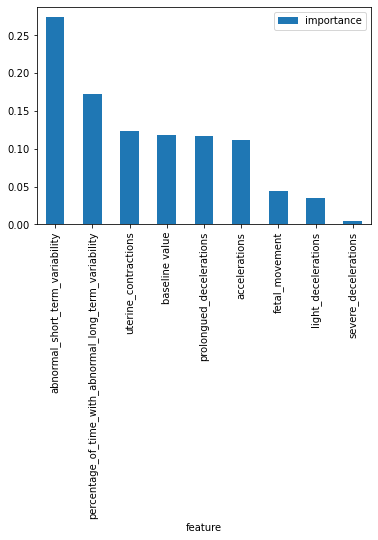

In [58]:
importances.plot.bar()
#visual of the importances to see which features, if any, can be dropped

In [59]:
test  = test.drop("severe_decelerations", axis=1)
train = train.drop("severe_decelerations", axis=1)
#severe decelerations are not important, dropping to reduce the chances of overfitting/too many features.

In [60]:
random_forest = RandomForestClassifier(n_estimators=100, oob_score = True)
random_forest.fit(X_train, Y_train)
Y_prediction = random_forest.predict(X_test)

random_forest.score(X_train, Y_train)

acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
print(round(acc_random_forest,2,), "%")
#retraining the model

99.88 %


In [61]:
print("oob score:", round(random_forest.oob_score_, 4)*100, "%")
#oob score to check accuracy/validity of the rf model

oob score: 94.94 %


In [62]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
predictions = cross_val_predict(random_forest, X_train, Y_train, cv=3)
cf_matrix=confusion_matrix(Y_train, predictions)
cf_matrix
#confusion matrix, visual to follow

array([[1316,   21],
       [  68,  295]])

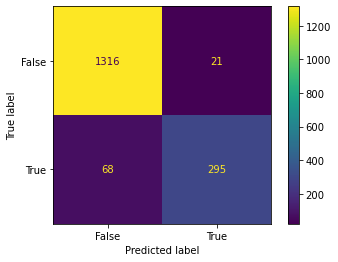

In [63]:
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(Y_train, predictions)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()
#1316 fetuses were correctly classified as normal (true positive)
#21 fetuses were incorrectly classified as normal (false negative)
#295 fetuses were correctly classified as abnormal (true negative)
#68 fetuses were incorrectly classified as abnormal (false positive)

In [64]:
from sklearn.metrics import precision_score, recall_score
print("Precision:", precision_score(Y_train, predictions))

print("Recall:",recall_score(Y_train, predictions))
#precision = 93%
#recall= 81%

Precision: 0.9335443037974683
Recall: 0.8126721763085399


In [65]:
from sklearn.metrics import f1_score

f1_score(Y_train, predictions)
#f-score = 86.9%

0.8689248895434463

In [66]:
y_pred=random_forest.predict(X_train)
print (random_forest.score(X_train, Y_train))
#making predictions

0.9988235294117647


In [67]:
df=pd. DataFrame({'Actual': Y_train,
'Predicted' :y_pred})
df
#putting predictions in a df to check accuracy

,Actual,Predicted
620,0,0
330,1,1
402,1,1
1815,0,0
847,0,0
...,...,...
2032,1,1
799,1,1
384,0,0
1427,0,0


In [204]:
f= df['Actual']==df['Predicted']
f.sum()
#predictions were correct for all but 2 entries

1698

In [70]:
probability = random_forest.predict_proba(X_test)[:,1]
probability = probability*5
probability
#extracting class probabilities where y=1 (fetus is abnormal)

array([0.1       , 0.5       , 0.        , 5.        , 0.        ,
       0.55      , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.05      , 3.5       , 0.45      ,
       0.3       , 0.        , 0.        , 0.65      , 0.3       ,
       0.        , 0.9       , 0.        , 3.59166667, 0.        ,
       0.        , 0.25      , 1.05      , 4.7       , 0.2       ,
       0.        , 0.55      , 4.95      , 1.6       , 0.        ,
       0.        , 4.7       , 0.3       , 0.1       , 0.        ,
       0.        , 0.05      , 4.7       , 0.        , 4.71666667,
       0.05      , 0.35      , 5.        , 0.25      , 0.        ,
       0.        , 0.6       , 5.        , 0.15      , 5.        ,
       0.45      , 0.05      , 0.05      , 0.05      , 0.        ,
       4.65      , 0.        , 0.1       , 4.65      , 4.66666667,
       0.05      , 4.75      , 0.1       , 5.        , 0.        ,
       0.15      , 0.95      , 0.15      , 0.05      , 0.     

In [137]:
risk_score = pd.DataFrame({'normal': test.normal,
'Risk Score': probability})
risk_score
#creating df to make sure the risk scores make sense for y=1 and y=0

,normal,Risk Score
459,0,0.100000
2081,0,0.500000
1075,0,0.000000
331,1,5.000000
1964,0,0.000000
1821,0,0.550000
85,0,0.000000
1033,0,0.000000
266,0,0.000000
1647,0,0.000000


In [176]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

display(risk_score)
#displaying all records to check for consistency/accuracy

,normal,Risk Score
459,0,0.100000
2081,0,0.500000
1075,0,0.000000
331,1,5.000000
1964,0,0.000000
1821,0,0.550000
85,0,0.000000
1033,0,0.000000
266,0,0.000000
1647,0,0.000000


<AxesSubplot:>

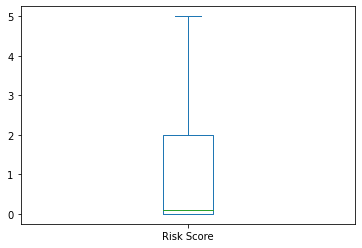

In [197]:
risk_score.plot.box(x='normal', y='Risk Score')
#IQR between 0 and 2, median just > 0, skewed left

<AxesSubplot:xlabel='normal', ylabel='Risk Score'>

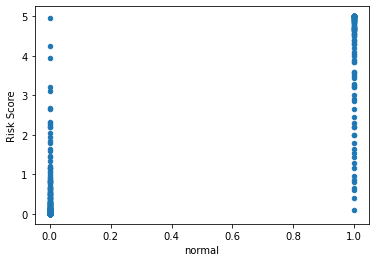

In [198]:
risk_score.plot.scatter(x='normal', y='Risk Score')

In [ ]:
#normal=lower risk scores / abnormal= higher risk scores.